# Analysis in Progress

In [1]:
import pandas as pd

df = pd.read_json("results-in-progress.jsonl.gz", lines=True)
df["index.runtime_wallclock"] = df["index.runtime_wallclock"].apply(lambda i: int(i.split()[0]))
df["retrieval.runtime_wallclock"] = df["retrieval.runtime_wallclock"].apply(lambda i: int(i.split()[0]))


## Has the Retrieval Engine an impact on Efficiency?

In [2]:
df[['Retrieval', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("Retrieval").describe(percentiles=[0.5, .9, .99])

index_1000.runtime_wallclock                            \
                                             count         mean          std   
Retrieval                                                                      
duckdb                                       195.0    32.655004    16.553455   
kannolo                                      165.0   830.667715   286.285207   
naive-search                                 195.0     0.000000     0.000000   
pyserini-lsr                                  70.0  1041.313752  1570.219941   
pyterrier-naive                               15.0  3575.713514  4737.593281   
pyterrier-pisa                                15.0   281.255554   125.443856   
pyterrier-splade                             195.0   354.632573   112.008734   
pyterrier-splade-pisa                        195.0   148.774381    55.198409   
pytorch-naive                                194.0     3.238610     1.146263   
seismic                                      195.0  1557.414508  1531.278173   

                                                                           \
                              min          50%          90%           99%   
Retrieval                                                                   
duckdb                   1.894627    30.317779    53.004758     86.790710   
kannolo                108.676027   812.622421  1206.765506   1493.531494   
naive-search             0.000000     0.000000     0.000000      0.000000   
pyserini-lsr           137.014584   586.576123   995.260849   7002.272921   
pyterrier-naive         96.130498   789.213965  7886.830092  16012.648596   
pyterrier-pisa          51.053762   252.259412   419.153645    456.829419   
pyterrier-splade        92.861812   343.355169   495.721866    685.026913   
pyterrier-splade-pisa   20.141332   148.183535   216.804169    278.094675   
pytorch-naive            0.463579     3.270915     4.513163      6.189430   
seismic                 37.667715  1248.679619  2640.948310   7483.719590   

                                    retrieval_per_query.runtime_wallclock  \
                                max                                 count   
Retrieval                                                                   
duckdb                    95.634737                                 195.0   
kannolo                 1542.544549                                 165.0   
naive-search               0.000000                                 195.0   
pyserini-lsr            7033.756366                                  70.0   
pyterrier-naive        17309.236618                                  15.0   
pyterrier-pisa           461.554229                                  15.0   
pyterrier-splade         701.036834                                 195.0   
pyterrier-splade-pisa    289.973555                                 195.0   
pytorch-naive              7.023121                                 194.0   
seismic                16132.208273                                 195.0   

                                                                               \
                            mean        std        min        50%         90%   
Retrieval                                                                       
duckdb                 30.250143  45.751311   4.465116  11.581395  100.048719   
kannolo                 1.191283   0.453386   0.425926   1.060000    1.860000   
naive-search           20.989811  20.663329   1.116279   8.775510   54.476000   
pyserini-lsr           30.846679  33.417110  12.333333  20.837500   39.254000   
pyterrier-naive        15.923402   2.459242  10.651163  16.380000   18.372000   
pyterrier-pisa          0.622471   0.232476   0.400000   0.560000    0.816000   
pyterrier-splade       30.665442  15.638813  15.061224  24.448980   50.120000   
pyterrier-splade-pisa   9.599451  15.908978   0.469388   3.020000   30.844000   
pytorch-naive           1.302823   0.508074   0.232558   1.265306    1.919000   
seism

In [3]:
df[['Retrieval', "index.energy_total", "retrieval.energy_total"]].groupby("Retrieval").describe(percentiles=[0.5, .9, .99])

index.energy_total                                    \
                                   count       mean         std  min   50%   
Retrieval                                                                    
duckdb                             195.0   0.246154    0.443653  0.0   0.0   
kannolo                            165.0  13.303030    6.191481  1.0  14.0   
naive-search                       195.0   0.000000    0.000000  0.0   0.0   
pyserini-lsr                        70.0  17.342857   28.225225  2.0   9.0   
pyterrier-naive                     15.0  69.600000  114.065645  1.0  13.0   
pyterrier-pisa                      15.0   4.866667    3.907258  0.0   4.0   
pyterrier-splade                   195.0   5.210256    2.309081  0.0   5.0   
pyterrier-splade-pisa              195.0   2.102564    1.272121  0.0   2.0   
pytorch-naive                      194.0   0.000000    0.000000  0.0   0.0   
seismic                            195.0  24.179487   29.617207  0.0  21.0   

                                            retrieval.energy_total            \
                         90%     99%    max                  count      mean   
Retrieval                                                                      
duckdb                   1.0    1.00    2.0                  195.0  0.174359   
kannolo                 21.0   29.00   33.0                  165.0  0.000000   
naive-search             0.0    0.00    0.0                  195.0  0.035897   
pyserini-lsr            21.0  134.41  142.0                   70.0  0.071429   
pyterrier-naive        162.6  396.88  433.0                   15.0  0.000000   
pyterrier-pisa           9.6   13.44   14.0                   15.0  0.000000   
pyterrier-splade         8.0   10.06   13.0                  195.0  0.041026   
pyterrier-splade-pisa    4.0    5.06    6.0                  195.0  0.020513   
pytorch-naive            0.0    0.00    0.0                  194.0  0.000000   
seismic                 36.0  115.96  365.0                  195.0  0.000000   

                                                           
                            std  min  50%  90%   99%  max  
Retrieval                                                  
duckdb                 0.574689  0.0  0.0  1.0  2.12  5.0  
kannolo                0.000000  0.0  0.0  0.0  0.00  0.0  
naive-search           0.212359  0.0  0.0  0.0  1.00  2.0  
pyserini-lsr           0.310279  0.0  0.0  0.0  1.31  2.0  
pyterrier-naive        0.000000  0.0  0.0  0.0  0.00  0.0  
pyterrier-pisa         0.000000  0.0  0.0  0.0  0.00  0.0  
pyterrier-splade       0.284223  0.0  0.0  0.0  1.06  3.0  
pyterrier-splade-pisa  0.174656  0.0  0.0  0.0  1.00  2.0  
pytorch-naive          0.000000  0.0  0.0  0.0  0.00  0.0  
seismic                0.000000  0.0  0.0  0.0  0.00  0.0

In [4]:
def fill(f, cnt):
    for _ in range(cnt-len(f)):
        f = '\\phantom{0}' + f
    return f

def rows_efficiency_table():
    df_copy = df.copy()
    df_copy["index.runtime_wallclock"] = df_copy["index_1000.runtime_wallclock"]
    df_copy["retrieval.runtime_wallclock"] = df_copy["retrieval_per_query.runtime_wallclock"]
    df_runtime = df_copy[['Retrieval', "index.runtime_wallclock", "retrieval.runtime_wallclock"]].groupby("Retrieval").describe(percentiles=[0.5, .9, .99])
    ret = {}

    for k, k_df in [('runtime_wallclock', df_runtime)]:
        aggr = {}
        for _, i in k_df.reset_index().iterrows():
            def val(percentile, field):
                v = i[(f'{field}.{k}', f'{percentile}%')]
                return fill("{:.1f}".format(v), 7)

            aggr[i[('Retrieval', '')]] = {
                "index":  ' & '.join([val(p, 'index') for p in ["50", "90", "99"]]),
                "retrieval":  ' & '.join([val(p, 'retrieval') for p in ["50", "90", "99"]])
            }
        
        ret[k] = aggr

    means = {}
    sums = {}
    for _, i in df[['Retrieval', "index.energy_total", "retrieval.energy_total"]].groupby(["Retrieval"]).mean().reset_index().iterrows():
        means[i["Retrieval"]] = i.to_dict()

    for _, i in df[['Retrieval', "index.energy_total", "retrieval.energy_total"]].groupby(["Retrieval"]).sum().reset_index().iterrows():
        sums[i["Retrieval"]] = i.to_dict()


    def report(approach):
        indx = sums[approach]["index.energy_total"]
        if approach not in ('pyterrier-pisa', 'pyterrier-naive'):
            indx = indx/11

        return ' & '.join([ret["runtime_wallclock"][approach]["index"], ret["runtime_wallclock"][approach]["retrieval"], fill("{:.1f}".format(means[approach]["index.energy_total"]), 5), fill("{:.1f}".format(indx), 5), "{:.1f}".format(means[approach]["retrieval.energy_total"]), fill("{:.1f}".format(sums[approach]["retrieval.energy_total"]), 4)])

    return f"""\\midrule
DuckDB & {report('duckdb')} \\\\
kANNolo & {report('kannolo')} \\\\
Na""" + "{\\\"i}" + f"""ve & {report('naive-search')} \\\\

PISA & {report('pyterrier-splade-pisa')} \\\\
PyTerrier & {report('pyterrier-splade')} \\\\
Seismic & {report('seismic')} \\\\

\\midrule

BM25@PyTerrier & {report('pyterrier-naive')} \\\\
BM25@PISA & {report('pyterrier-pisa')} \\\\"""

print(rows_efficiency_table())

\midrule
DuckDB & \phantom{0}\phantom{0}\phantom{0}30.3 & \phantom{0}\phantom{0}\phantom{0}53.0 & \phantom{0}\phantom{0}\phantom{0}86.8 & \phantom{0}\phantom{0}\phantom{0}11.6 & \phantom{0}\phantom{0}100.0 & \phantom{0}\phantom{0}186.5 & \phantom{0}\phantom{0}0.2 & \phantom{0}\phantom{0}4.4 & 0.2 & 34.0 \\
kANNolo & \phantom{0}\phantom{0}812.6 & \phantom{0}1206.8 & \phantom{0}1493.5 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}1.1 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}1.9 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}2.3 & \phantom{0}13.3 & 199.5 & 0.0 & \phantom{0}0.0 \\
Na{\"i}ve & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}8.8 & \phantom{0}\phantom{0}\phantom{0}54.5 & \phantom{0}\phantom{0}\phantom{0}73.3 & \phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}0.0 & 0.0 & \phantom{0}7.0 \\

PISA & \phantom{0}\phantom{0}148.2 & \p

## Has the Retrieval Engine an impact on Effectiveness?

In [5]:
df[['Retrieval', "nDCG@10", "nDCG(judged_only=True)@10", "P@10"]].groupby("Retrieval").describe()

nDCG@10                                          \
                        count      mean       std       min       25%   
Retrieval                                                               
duckdb                  195.0  0.375867  0.173767  0.015273  0.232259   
kannolo                 165.0  0.387891  0.163490  0.094183  0.245708   
naive-search            195.0  0.375773  0.173733  0.017147  0.232922   
pyserini-lsr             70.0  0.202301  0.070422  0.015643  0.170756   
pyterrier-naive          15.0  0.304539  0.150126  0.050402  0.225021   
pyterrier-pisa           15.0  0.298444  0.156323  0.038302  0.202125   
pyterrier-splade        195.0  0.375732  0.173593  0.015531  0.230243   
pyterrier-splade-pisa   195.0  0.375753  0.173618  0.015531  0.229869   
pytorch-naive           194.0  0.172637  0.107664  0.004051  0.091064   
seismic                 195.0  0.372068  0.172285  0.073129  0.228449   

                                                    nDCG(judged_only=True)@10  \
                            50%       75%       max                     count   
Retrieval                                                                       
duckdb                 0.389198  0.474466  0.770543                     195.0   
kannolo                0.405832  0.474929  0.740801                     165.0   
naive-search           0.388013  0.474490  0.770543                     195.0   
pyserini-lsr           0.202539  0.255417  0.326889                      70.0   
pyterrier-naive        0.349887  0.420963  0.496040                      15.0   
pyterrier-pisa         0.368362  0.412174  0.483166                      15.0   
pyterrier-splade       0.388490  0.475797  0.770630                     195.0   
pyterrier-splade-pisa  0.388490  0.475725  0.770630                     195.0   
pytorch-naive          0.166387  0.217000  0.530313                     194.0   
seismic                0.370243  0.474490  0.770543                     195.0   

                                 ...                       P@10            \
                           mean  ...       75%       max  count      mean   
Retrieval                        ...                                        
duckdb                 0.393582  ...  0.478412  0.771525  195.0  0.425943   
kannolo                0.406434  ...  0.481933  0.741312  165.0  0.440229   
naive-search           0.393499  ...  0.478345  0.771525  195.0  0.425777   
pyserini-lsr           0.236382  ...  0.295893  0.361609   70.0  0.276700   
pyterrier-naive        0.311530  ...  0.421002  0.496336   15.0  0.349241   
pyterrier-pisa         0.305061  ...  0.412555  0.486546   15.0  0.342201   
pyterrier-splade       0.393402  ...  0.479656  0.771613  195.0  0.425656   
pyterrier-splade-pisa  0.393401  ...  0.479656  0.771613  195.0  0.425663   
pytorch-naive          0.246315  ...  0.307382  0.585276  194.0  0.194317   
seismic                0.390014  ...  0.476860  0.771525  195.0  0.421355   

                                                                         \
                            std       min       25%       50%       75%   
Retrieval                                                                 
duckdb                 0.168651  0.026000  0.314292  0.394000  0.512000   
kannolo                0.157733  0.170833  0.320000  0.406000  0.520000   
naive-search           0.168518  0.032000  0.315292  0.394000  0.512000   
pyserini-lsr           0.074711  0.026000  0.266500  0.296000  0.328000   
pyterrier-naive        0.147687  0.114000  0.268000  0.375510  0.411000   
pyterrier-pisa         0.154170  0.100000  0.247000  0.382000  0.421000   
pyterrier-splade       0.168389  0.030000  0.317333  0.394000  0.512000   
pyterrier-splade-pisa  0.168387  0.030000  0.317333  0.394000  0.512000   
pytorch-naive          0.111097  0.008000  0.132500  0.174000  0.218000   
seismic                0.167141  0.116000  0.307125  0.387037  0.499371   

                                 
      

In [6]:
df[['Retrieval', "nDCG@10", "nDCG(judged_only=True)@10", "P@10", "ir-dataset-id"]].groupby(['Retrieval', "ir-dataset-id"]).aggregate({"nDCG@10": "mean", "nDCG(judged_only=True)@10": "mean", "P@10": "mean"}).reset_index()

,Retrieval,ir-dataset-id,nDCG@10,nDCG(judged_only=True)@10,P@10
0,duckdb,clueweb09/en/trec-web-2009,0.175684,0.207926,0.239692
1,duckdb,clueweb09/en/trec-web-2010,0.178150,0.211744,0.273558
2,duckdb,clueweb09/en/trec-web-2011,0.266129,0.298565,0.288923
3,duckdb,clueweb09/en/trec-web-2012,0.150158,0.181681,0.265077
4,duckdb,clueweb12/b13/trec-misinfo-2019,0.461762,0.475965,0.537231
...,...,...,...,...,...
136,seismic,disks45/nocr/trec-robust-2004/fold4,0.449961,0.450674,0.421036
137,seismic,disks45/nocr/trec-robust-2004/fold5,0.441077,0.443087,0.443846
138,seismic,msmarco-passage/trec-dl-2019/judged,0.670985,0.674464,0.762433
139,seismic,msmarco-passage/trec-dl-2020/judged,0.652598,0.655637,0.697863


In [8]:
df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").mean().reset_index()

,embedding/model,embedding/query.energy_total,embedding/doc.energy_total
0,bge-m3,214.322917,509815.406250
1,bm25,8.715789,-3.431579
2,castorini/unicoil-noexp-msmarco-passage,119.342342,55845.126126
3,naver/splade-v3,117.306306,69571.000000
4,naver/splade-v3-distilbert,97.414414,46502.396396
5,naver/splade-v3-doc,94.536364,69486.363636
6,naver/splade-v3-lexical,125.045455,69413.472727
7,naver/splade_v2_distil,95.690909,46288.645455
8,opensearch-project/opensearch-neural-sparse-en...,76.627273,46131.218182
9,opensearch-project/opensearch-neural-sparse-en...,60.590909,32248.318182


In [9]:
MEASURES = ["nDCG@10", "P@10"] #"nDCG(judged_only=True)@10"]

def df_for_eval_embeddings():
    ret = df.copy()
    ret = ret[['embedding/model', "ir-dataset-id"] + MEASURES].groupby(['embedding/model', "ir-dataset-id"]).aggregate({i: "mean" for i in MEASURES}).reset_index()
    ret["corpus"] = ret["ir-dataset-id"].apply(lambda i: i.split("/")[0])
    return ret

def df_for_lexical_embeddings():
    ret = df.copy()
    ret = ret[['Retrieval', "ir-dataset-id"] + MEASURES].groupby(['Retrieval', "ir-dataset-id"]).aggregate({i: "mean" for i in MEASURES}).reset_index()
    ret["corpus"] = ret["ir-dataset-id"].apply(lambda i: i.split("/")[0])
    return ret

MODEL_TO_FULL_NAME = {
    'bge-m3': 'bge-m3',
    'UniCoil': 'castorini/unicoil-noexp-msmarco-passage',
    'Splade':'webis/splade',
    'Splade2 Dist.': 'naver/splade_v2_distil',
    'Splade3': 'naver/splade-v3',
    'Splade3 Dist.': 'naver/splade-v3-distilbert',
    'Splade3 Doc': 'naver/splade-v3-doc',
    'OS2 Dist.': 'opensearch-project/opensearch-neural-sparse-encoding-v2-distill',
    'OS2 Doc': 'opensearch-project/opensearch-neural-sparse-encoding-doc-v2-distill',
    'OS2 Mini': 'opensearch-project/opensearch-neural-sparse-encoding-doc-v2-mini',
    'OS3 Dist.': 'opensearch-project/opensearch-neural-sparse-encoding-doc-v3-distill',
}

MODEL_TO_ENERGY = {}
for _, i in df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").mean().reset_index().iterrows():
    MODEL_TO_ENERGY[i["embedding/model"]] = i.to_dict()

def effectiveness_line(model):
    ret = []
    df_for_eval = df_for_eval_embeddings()
    df_for_eval = df_for_eval[df_for_eval["embedding/model"] == MODEL_TO_FULL_NAME[model]]

    for measure in MEASURES:
        for corpus in ['clueweb09', 'clueweb12', 'msmarco-passage', 'disks45', 'msmarco-segment-v2.1']:
            ret += [df_for_eval[df_for_eval["corpus"] == corpus][measure].mean()]
        ret += [df_for_eval[measure].mean()]


    return str(int(MODEL_TO_ENERGY[MODEL_TO_FULL_NAME[model]]["embedding/doc.energy_total"])) + " & " + (" & ".join(["{:.2f}".format(i).replace("0.", ".") for i in ret]) +" \\\\")

def rows_effectivness_table():
    print("\\midrule")
    for k in sorted(MODEL_TO_FULL_NAME.keys()):
        print(k, "&", effectiveness_line(k))
    
    print("\\midrule")

    for model, name in [("pyterrier-naive", "BM25 PyTerrier"), ("pyterrier-pisa", "BM25 PISA")]:
        df_for_eval = df_for_lexical_embeddings()
        df_for_eval = df_for_eval[df_for_eval["Retrieval"] == model]
        ret = []
        for measure in MEASURES:
            for corpus in ['clueweb09', 'clueweb12', 'msmarco-passage', 'disks45', 'msmarco-segment-v2.1']:
                ret += [df_for_eval[df_for_eval["corpus"] == corpus][measure].mean()]
            ret += [df_for_eval[measure].mean()]
        
        print("\\multicolumn{2}{@{}l}{" + name + "} & " + (" & ".join(["{:.2f}".format(i).replace("0.", ".") for i in ret]) +" \\\\"))

rows_effectivness_table()

\midrule
OS2 Dist. & 46229 & .22 & .31 & .67 & .45 & .38 & .39 & .32 & .39 & .74 & .44 & .52 & .44 \\
OS2 Doc & 46131 & .22 & .30 & .64 & .42 & .33 & .37 & .30 & .38 & .71 & .40 & .47 & .42 \\
OS2 Mini & 32248 & .22 & .30 & .64 & .41 & .31 & .36 & .29 & .37 & .70 & .39 & .45 & .40 \\
OS3 Dist. & 47728 & .23 & .30 & .66 & .42 & .33 & .37 & .30 & .37 & .72 & .41 & .46 & .42 \\
Splade & 43007 & .21 & .29 & .69 & .43 & .37 & .37 & .29 & .36 & .75 & .41 & .49 & .42 \\
Splade2 Dist. & 46288 & .19 & .30 & .68 & .44 & .32 & .37 & .27 & .39 & .75 & .43 & .45 & .42 \\
Splade3 & 69571 & .21 & .32 & .69 & .45 & .38 & .39 & .29 & .39 & .76 & .44 & .52 & .44 \\
Splade3 Dist. & 46502 & .21 & .31 & .70 & .44 & .35 & .38 & .29 & .39 & .77 & .43 & .49 & .43 \\
Splade3 Doc & 69486 & .15 & .26 & .67 & .40 & .29 & .33 & .21 & .33 & .72 & .39 & .42 & .38 \\
UniCoil & 55845 & .17 & .25 & .57 & .35 & .28 & .31 & .23 & .32 & .64 & .35 & .39 & .35 \\
bge-m3 & 509815 & .09 & .23 & .40 & .34 & .20 & .25 & .14 & .

In [10]:
df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").median().reset_index()

,embedding/model,embedding/query.energy_total,embedding/doc.energy_total
0,bge-m3,140.0,366441.5
1,bm25,4.0,-585.0
2,castorini/unicoil-noexp-msmarco-passage,117.0,47354.0
3,naver/splade-v3,116.0,59428.0
4,naver/splade-v3-distilbert,96.0,39485.0
5,naver/splade-v3-doc,93.0,58701.0
6,naver/splade-v3-lexical,124.0,57589.0
7,naver/splade_v2_distil,93.0,38305.0
8,opensearch-project/opensearch-neural-sparse-en...,77.0,39308.0
9,opensearch-project/opensearch-neural-sparse-en...,60.0,27152.0


## Has the Embedding Model an impact on Effectiveness?

In [11]:
df[['embedding/model', "nDCG@10", "P@10"]].groupby("embedding/model").describe()

nDCG@10            \
                                                     count      mean   
embedding/model                                                        
bge-m3                                                96.0  0.242161   
bm25                                                  95.0  0.224960   
castorini/unicoil-noexp-msmarco-passage              111.0  0.299846   
naver/splade-v3                                      111.0  0.377524   
naver/splade-v3-distilbert                           111.0  0.372007   
naver/splade-v3-doc                                  110.0  0.324416   
naver/splade-v3-lexical                              110.0  0.361311   
naver/splade_v2_distil                               110.0  0.362123   
opensearch-project/opensearch-neural-sparse-enc...   110.0  0.361336   
opensearch-project/opensearch-neural-sparse-enc...   110.0  0.354247   
opensearch-project/opensearch-neural-sparse-enc...   110.0  0.364336   
opensearch-project/opensearch-neural-sparse-enc...   110.0  0.380236   
webis/splade                                         110.0  0.366703   

                                                                        \
                                                         std       min   
embedding/model                                                          
bge-m3                                              0.138415  0.030381   
bm25                                                0.157785  0.004051   
castorini/unicoil-noexp-msmarco-passage             0.154244  0.048743   
naver/splade-v3                                     0.182313  0.060545   
naver/splade-v3-distilbert                          0.181906  0.058986   
naver/splade-v3-doc                                 0.188617  0.056479   
naver/splade-v3-lexical                             0.184820  0.057173   
naver/splade_v2_distil                              0.183434  0.045248   
opensearch-project/opensearch-neural-sparse-enc...  0.166050  0.059720   
opensearch-project/opensearch-neural-sparse-enc...  0.163997  0.072001   
opensearch-project/opensearch-neural-sparse-enc...  0.168999  0.058518   
opensearch-project/opensearch-neural-sparse-enc...  0.174600  0.075500   
webis/splade                                        0.181798  0.064201   

                                                                        \
                                                         25%       50%   
embedding/model                                                          
bge-m3                                              0.119896  0.191684   
bm25                                                0.086748  0.195761   
castorini/unicoil-noexp-msmarco-passage             0.165395  0.255315   
naver/splade-v3                                     0.227322  0.286815   
naver/splade-v3-distilbert                          0.210942  0.320990   
naver/splade-v3-doc                                 0.181357  0.290405   
naver/splade-v3-lexical                             0.197965  0.347589   
naver/splade_v2_distil                              0.180976  0.340278   
opensearch-project/opensearch-neural-sparse-enc...  0.229021  0.339753   
opensearch-project/opensearch-neural-sparse-enc...  0.213332  0.342017   
opensearch-project/opensearch-neural-sparse-enc...  0.228157  0.349941   
opensearch-project/opensearch-neural-sparse-enc...  0.249031  0.370282   
webis/splade                                        0.216796  0.355573   

                                                                         P@10  \
                                                         75%       max  count   
embedding/model                                                                 
bge-m3                                              0.388490  0.446851   96.0   
bm25                                                0.369558  0.495772   95.0   
castorini/unicoil-noexp-msmarco-passage             0.381730  0.619936  111.0   
naver/splade-v3                           

## The Oracle LSR Model

In [12]:
from statistics import mean
ret = []
for measure in MEASURES:
    effectiveness_scores = {}
    all_effectiveness_scores = []
    for ds_id in df['ir-dataset-id'].unique():
        oracle = df[df['ir-dataset-id'] == ds_id][["embedding/model", measure, "Retrieval"]].sort_values(measure, ascending=False).iloc[0]
        if ds_id.split("/")[0] not in effectiveness_scores:
            effectiveness_scores[ds_id.split("/")[0]] = []
        all_effectiveness_scores += [oracle[measure]]
        effectiveness_scores[ds_id.split("/")[0]] += [oracle[measure]]

    for corpus in ['clueweb09', 'clueweb12', 'msmarco-passage', 'disks45', 'msmarco-segment-v2.1']:
        ret += [mean(effectiveness_scores[corpus])]
    ret += [mean(all_effectiveness_scores)]


print(" & ".join(["{:.2f}".format(i).replace("0.", ".") for i in ret]) +" \\\\")

.25 & .35 & .76 & .50 & .44 & .43 & .35 & .44 & .83 & .48 & .59 & .49 \\


In [50]:
ret

array([3.86773332, 3.96348841, 4.37647101, 4.11210963, 4.05242157])

## Has the Embedding Model an impact on Efficiency?

In [23]:
df[['embedding/model', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("embedding/model").describe(percentiles=[0.5, .9, .99])

index_1000.runtime_wallclock  \
                                                                          count   
embedding/model                                                                   
castorini/unicoil-noexp-msmarco-passage                                    90.0   
naver/splade-v3                                                            90.0   
naver/splade-v3-distilbert                                                 90.0   
naver/splade-v3-doc                                                        90.0   
naver/splade-v3-lexical                                                    90.0   
naver/splade_v2_distil                                                     90.0   
opensearch-project/opensearch-neural-sparse-enc...                         90.0   
opensearch-project/opensearch-neural-sparse-enc...                         90.0   
opensearch-project/opensearch-neural-sparse-enc...                         90.0   
opensearch-project/opensearch-neural-sparse-enc...                         90.0   
webis/splade                                                               90.0   

                                                                            \
                                                          mean         std   
embedding/model                                                              
castorini/unicoil-noexp-msmarco-passage             245.397195  281.480671   
naver/splade-v3                                     487.423242  580.081667   
naver/splade-v3-distilbert                          529.171165  630.097328   
naver/splade-v3-doc                                 428.818565  501.343221   
naver/splade-v3-lexical                             584.834537  745.322081   
naver/splade_v2_distil                              670.597939  858.458576   
opensearch-project/opensearch-neural-sparse-enc...  406.678874  506.886693   
opensearch-project/opensearch-neural-sparse-enc...  526.494362  679.050026   
opensearch-project/opensearch-neural-sparse-enc...  340.452444  368.738172   
opensearch-project/opensearch-neural-sparse-enc...  410.563499  458.040575   
webis/splade                                        516.574860  587.263492   

                                                                     \
                                                    min         50%   
embedding/model                                                       
castorini/unicoil-noexp-msmarco-passage             0.0  100.704342   
naver/splade-v3                                     0.0  220.579225   
naver/splade-v3-distilbert                          0.0  243.288255   
naver/splade-v3-doc                                 0.0  225.730825   
naver/splade-v3-lexical                             0.0  282.489035   
naver/splade_v2_distil                              0.0  291.709477   
opensearch-project/opensearch-neural-sparse-enc...  0.0  203.304258   
opensearch-project/opensearch-neural-sparse-enc...  0.0  269.988616   
opensearch-project/opensearch-neural-sparse-enc...  0.0  198.250749   
opensearch-project/opensearch-neural-sparse-enc...  0.0  221.316292   
webis/splade                                        0.0  227.362785   

                                                                              \
                                                            90%          99%   
embedding/model                                                                
castorini/unicoil-noexp-msmarco-passage              695.238260   859.999232   
naver/splade-v3                                     1268.556851  2170.685660   
naver/splade-v3-distilbert                          1443.545295  2321.472605   
naver/splade-v3-doc                                 1020.322349  1949.111096   
naver/splade-v3-lexical                             1500.981640  3096.175301   
naver/splade_v2_distil                              1762.852534  3475.263665   
opensearch-project/opensearch-neural-sparse-enc...  1078.815343  1985.833831   


In [24]:
df[['embedding/model', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("embedding/model").describe(percentiles=[0.5, .9, .99]).reset_index()

embedding/model  \
                                                        
0             castorini/unicoil-noexp-msmarco-passage   
1                                     naver/splade-v3   
2                          naver/splade-v3-distilbert   
3                                 naver/splade-v3-doc   
4                             naver/splade-v3-lexical   
5                              naver/splade_v2_distil   
6   opensearch-project/opensearch-neural-sparse-en...   
7   opensearch-project/opensearch-neural-sparse-en...   
8   opensearch-project/opensearch-neural-sparse-en...   
9   opensearch-project/opensearch-neural-sparse-en...   
10                                       webis/splade   

   index_1000.runtime_wallclock                                           \
                          count        mean         std  min         50%   
0                          90.0  245.397195  281.480671  0.0  100.704342   
1                          90.0  487.423242  580.081667  0.0  220.579225   
2                          90.0  529.171165  630.097328  0.0  243.288255   
3                          90.0  428.818565  501.343221  0.0  225.730825   
4                          90.0  584.834537  745.322081  0.0  282.489035   
5                          90.0  670.597939  858.458576  0.0  291.709477   
6                          90.0  406.678874  506.886693  0.0  203.304258   
7                          90.0  526.494362  679.050026  0.0  269.988616   
8                          90.0  340.452444  368.738172  0.0  198.250749   
9                          90.0  410.563499  458.040575  0.0  221.316292   
10                         90.0  516.574860  587.263492  0.0  227.362785   

                                           \
            90%          99%          max   
0    695.238260   859.999232   862.249605   
1   1268.556851  2170.685660  2348.057238   
2   1443.545295  2321.472605  2517.949827   
3   1020.322349  1949.111096  2005.568772   
4   1500.981640  3096.175301  3117.489419   
5   1762.852534  3475.263665  3491.951134   
6   1078.815343  1985.833831  1993.985170   
7   1304.957025  2741.746179  2746.115423   
8    937.800858  1276.776091  1276.821853   
9   1053.841023  1562.547989  1727.602717   
10  1331.873327  2021.043466  2041.553593   

   retrieval_per_query.runtime_wallclock                                  \
                                   count       mean        std       min   
0                                   90.0   9.065422  10.706119  0.139535   
1                                   90.0  17.077019  17.079566  0.488372   
2                                   90.0  17.178343  17.949717  0.651163   
3                                   90.0   6.758019   7.897086  0.285714   
4                                   90.0   6.974247   7.934421  0.348837   
5                                   90.0  27.345260  25.299485  0.697674   
6                                   90.0   6.951584   7.943511  0.255814   
7                                   90.0   7.074312   7.667493  0.279070   
8                                   90.0   6.738767   7.323498  0.320000   
9                                   90.0  37.980436  43.091034  0.700000   
10                                  90.0  46.399697  52.346461  0.648148   

                                                   
          50%         90%         99%         max  
0    3.160000   27.596816   35.443640   43.921348  
1   10.282593   39.276000   56.958965   74.494382  
2    9.579457   43.310000   68.991000   69.100000  
3    4.625581   21.126367   27.412182   30.370787  
4    3.893520   21.932427   25.937685   29.573034  
5   20.951115   62.908000   95.187865  101.707865  
6    4.380000   21.420245   26.978413   32.629213  
7    4.402963   20.894000   25.985458   34.707865  
8    4.459302   20.898000   24.431806   24.629213  
9   32.010000  104.771933  164.715201  200.505618  
10  37.732083  129.337056  195.389504  274.730337

In [31]:
def model_efficiency_line(model):
    tmp = df[['embedding/model', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("embedding/model").describe(percentiles=[0.5, .9, .99])
    for _, i in tmp.iterrows():
        if i.name == MODEL_TO_FULL_NAME[model]:
            ret = []
            for k in ['index_1000.runtime_wallclock', 'retrieval_per_query.runtime_wallclock']:
                for p in ["50%", "90%", "99%"]:
                    ret += [i[(k, p)]]

            return ' & '.join([fill("{:.1f}".format(i), 6) for i in ret]) + ' \\\\'
    raise ValueError()
    


def rows_model_efficiency_table():
    print("\\midrule")
    for k in sorted(MODEL_TO_FULL_NAME.keys()):
        print(k, "&", model_efficiency_line(k))

rows_model_efficiency_table()

\midrule
OS2 Dist. & \phantom{0}221.3 & 1053.8 & 1562.5 & \phantom{0}\phantom{0}32.0 & \phantom{0}104.8 & \phantom{0}164.7 \\
OS2 Doc & \phantom{0}203.3 & 1078.8 & 1985.8 & \phantom{0}\phantom{0}\phantom{0}4.4 & \phantom{0}\phantom{0}21.4 & \phantom{0}\phantom{0}27.0 \\
OS2 Mini & \phantom{0}270.0 & 1305.0 & 2741.7 & \phantom{0}\phantom{0}\phantom{0}4.4 & \phantom{0}\phantom{0}20.9 & \phantom{0}\phantom{0}26.0 \\
OS3 Dist. & \phantom{0}198.3 & \phantom{0}937.8 & 1276.8 & \phantom{0}\phantom{0}\phantom{0}4.5 & \phantom{0}\phantom{0}20.9 & \phantom{0}\phantom{0}24.4 \\
Splade & \phantom{0}227.4 & 1331.9 & 2021.0 & \phantom{0}\phantom{0}37.7 & \phantom{0}129.3 & \phantom{0}195.4 \\
Splade2 Dist. & \phantom{0}291.7 & 1762.9 & 3475.3 & \phantom{0}\phantom{0}21.0 & \phantom{0}\phantom{0}62.9 & \phantom{0}\phantom{0}95.2 \\
Splade3 & \phantom{0}220.6 & 1268.6 & 2170.7 & \phantom{0}\phantom{0}10.3 & \phantom{0}\phantom{0}39.3 & \phantom{0}\phantom{0}57.0 \\
Splade3 Dist. & \phantom{0}243.3 & 1

In [ ]:
df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").describe()

embedding/query.energy_total  \
                                                                          count   
embedding/model                                                                   
castorini/unicoil-noexp-msmarco-passage                                    54.0   
naver/splade-v3                                                            54.0   
naver/splade-v3-distilbert                                                 54.0   
naver/splade-v3-doc                                                        54.0   
naver/splade-v3-lexical                                                    54.0   
naver/splade_v2_distil                                                     54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
webis/splade                                                               54.0   

                                                                          \
                                                          mean       std   
embedding/model                                                            
castorini/unicoil-noexp-msmarco-passage             120.444444  7.311574   
naver/splade-v3                                     116.555556  8.304731   
naver/splade-v3-distilbert                           96.000000  5.298629   
naver/splade-v3-doc                                  93.666667  8.498613   
naver/splade-v3-lexical                             124.444444  8.020414   
naver/splade_v2_distil                               93.777778  3.553721   
opensearch-project/opensearch-neural-sparse-enc...   76.000000  3.528857   
opensearch-project/opensearch-neural-sparse-enc...   60.222222  7.858817   
opensearch-project/opensearch-neural-sparse-enc...   76.055556  5.841997   
opensearch-project/opensearch-neural-sparse-enc...   95.888889  4.648662   
webis/splade                                        118.055556  8.738155   

                                                                         \
                                                      min    25%    50%   
embedding/model                                                           
castorini/unicoil-noexp-msmarco-passage             114.0  116.0  117.0   
naver/splade-v3                                     106.0  111.0  115.5   
naver/splade-v3-distilbert                           92.0   94.0   94.0   
naver/splade-v3-doc                                  83.0   91.0   92.0   
naver/splade-v3-lexical                             118.0  118.0  123.0   
naver/splade_v2_distil                               89.0   92.0   93.0   
opensearch-project/opensearch-neural-sparse-enc...   71.0   72.0   77.0   
opensearch-project/opensearch-neural-sparse-enc...   48.0   55.0   60.0   
opensearch-project/opensearch-neural-sparse-enc...   70.0   70.0   77.0   
opensearch-project/opensearch-neural-sparse-enc...   87.0   94.0   94.0   
webis/splade                                        109.0  110.0  117.0   

                                                                  \
                                                      75%    max   
embedding/model                                                    
castorini/unicoil-noexp-msmarco-passage             122.0  139.0   
naver/splade-v3                                     118.0  136.0   
naver/splade-v3-distilbert                           96.0  110.0   
naver/splade-v3-doc                                  93.0  116.0   
naver/splade-v3-lexical                             124.0  145.0   
naver/splade_v2_distil                               93.0  100.0   
opensearch-project/opensearch-neural-sparse-enc...   78.0   81.0   
opensearch-project/opensearch-neural-sparse-enc...   62.0   74.0   
opensearch-project/opens

In [ ]:
# TODO: this is wrong, lsr-benchmark retrieval experiments likely was executed without privileged mode, so that the tirex-tracker could not track energy.
#df[['Embedding', "index.energy_total", "retrieval.energy_total"]].groupby("Embedding").describe()

## Some more in detail analysis

In [26]:
df[['Retrieval', 'embedding/model', "index.runtime_wallclock", "retrieval.runtime_wallclock"]].groupby(["Retrieval", 'embedding/model']).agg({"index.runtime_wallclock": "mean", "retrieval.runtime_wallclock": "mean"}).reset_index()

,Retrieval,embedding/model,index.runtime_wallclock,retrieval.runtime_wallclock
0,duckdb,castorini/unicoil-noexp-msmarco-passage,1119.666667,858.666667
1,duckdb,naver/splade-v3,2422.600000,1151.066667
2,duckdb,naver/splade-v3-distilbert,2718.400000,1030.466667
3,duckdb,naver/splade-v3-doc,2114.800000,487.466667
4,duckdb,naver/splade-v3-lexical,3123.866667,459.200000
...,...,...,...,...
61,seismic,opensearch-project/opensearch-neural-sparse-en...,85842.733333,30.133333
62,seismic,opensearch-project/opensearch-neural-sparse-en...,114158.200000,36.933333
63,seismic,opensearch-project/opensearch-neural-sparse-en...,67817.066667,28.066667
64,seismic,opensearch-project/opensearch-neural-sparse-en...,80069.466667,91.866667


In [40]:
tmp = df[['Retrieval', 'embedding/model', "retrieval.runtime_wallclock"]].groupby(["Retrieval", 'embedding/model']).agg({"retrieval.runtime_wallclock": "mean"}).reset_index()

tmp = tmp[tmp["Retrieval"] == "kannolo"]

tmp.sort_values("retrieval.runtime_wallclock")

,Retrieval,embedding/model,retrieval.runtime_wallclock
17,kannolo,opensearch-project/opensearch-neural-sparse-en...,51.933333
19,kannolo,opensearch-project/opensearch-neural-sparse-en...,52.933333
11,kannolo,castorini/unicoil-noexp-msmarco-passage,57.466667
14,kannolo,naver/splade-v3-doc,57.600000
20,kannolo,opensearch-project/opensearch-neural-sparse-en...,59.333333
18,kannolo,opensearch-project/opensearch-neural-sparse-en...,60.466667
15,kannolo,naver/splade-v3-lexical,64.466667
12,kannolo,naver/splade-v3,64.733333
13,kannolo,naver/splade-v3-distilbert,67.066667
21,kannolo,webis/splade,69.000000


In [28]:
def correlation(model_a, model_b, method):
    
    df_tmp = df[['Retrieval', 'embedding/model', "index.runtime_wallclock", "retrieval.runtime_wallclock"]].groupby(["Retrieval", 'embedding/model']).agg({"index.runtime_wallclock": "mean", "retrieval.runtime_wallclock": "mean"}).reset_index()

    def eval_score(m, e):
        ret = df_tmp[(df_tmp["Retrieval"] == m) & (df_tmp["embedding/model"] == e)]
        assert len(ret) == 1
        return ret.iloc[0]["retrieval.runtime_wallclock"]
    
    df_corr = []
    for e in df_tmp["embedding/model"].unique():
        df_corr += [{"model": e, model_a: eval_score(model_a, e), model_b: eval_score(model_b, e)}]
    
    df_corr = pd.DataFrame(df_corr)

    return df_corr[[model_a, model_b]].corr(method=method).iloc[0][model_b]


MODEL_NAMES = {
    'duckdb': 'DuckDB',
    'kannolo': 'kANNolo',
    'naive-search': 'Naïve',
    'pyterrier-splade-pisa': 'PISA',
    'pyterrier-splade': 'PyTerrier',
    'seismic': 'Seismic',
}

def pairwise_correlations(method):
    df = []
    models = sorted(['duckdb', 'kannolo', 'naive-search', 'pyterrier-splade-pisa', 'pyterrier-splade', 'seismic'], key=lambda i: MODEL_NAMES[i])
    for a in range(len(models)):
        for b in range(len(models)):
            if b >= a:
                continue
            model_a, model_b = models[a], models[b]

            df.append({' ': MODEL_NAMES[model_a], '  ': MODEL_NAMES[model_b], method: correlation(model_a, model_b, method)})
    return pd.DataFrame(df)

pairwise_correlations('spearman')

,,,spearman
0,Naïve,DuckDB,0.709091
1,PISA,DuckDB,0.845455
2,PISA,Naïve,0.700000
3,PyTerrier,DuckDB,0.881818
4,PyTerrier,Naïve,0.745455
5,PyTerrier,PISA,0.763636
6,Seismic,DuckDB,0.627273
7,Seismic,Naïve,0.918182
8,Seismic,PISA,0.654545
9,Seismic,PyTerrier,0.681818


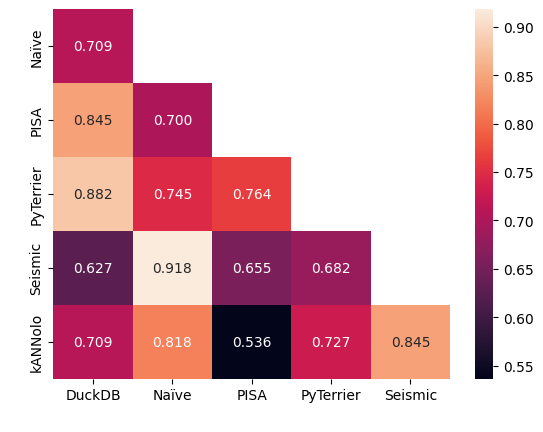

In [32]:
def plot(corr):
    import seaborn as sns
    fig = sns.heatmap(pairwise_correlations(corr).pivot(index=' ', columns='  ', values=corr), annot=True, fmt=".3f").get_figure()
    fig.savefig(f'efficiency-{corr}.pdf', bbox_inches='tight')

plot('spearman')

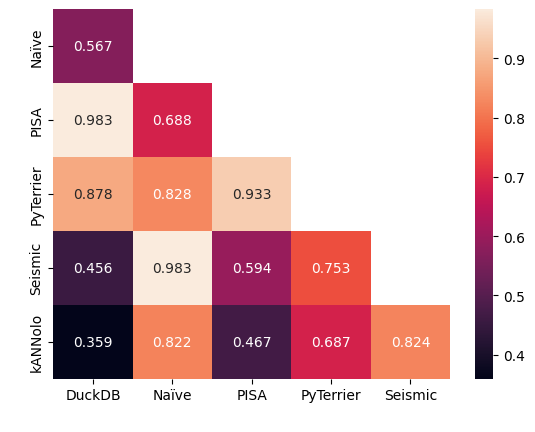

In [33]:
plot('pearson')

# Generate Evaluation DataFrame

The file `evaluation-in-progress.jsonl.gz` used below was created with `lsr-benchmark evaluate './*/*/*' -o evaluation-in-progress.jsonl.gz`. The results are intermediate, and these steps here slightly enrich the file `evaluation-in-progress.jsonl.gz` and remove datasets that do not yet have all approaches executed.

In [ ]:
import pandas as pd
from lsr_benchmark.datasets import all_embeddings
from tira.rest_api_client import Client
import json

df = pd.read_json('evaluation-in-progress.jsonl.gz', lines=True)
df["Retrieval"] = df["approach"].apply(lambda i: i.split("/")[-1])
del df["approach"]
APPROACHES = ["duckdb", "naive-search", "pyterrier-splade", "pyterrier-splade-pisa", "seismic", "kannolo", "pyterrier-naive", "pyterrier-pisa"]
tira = Client()
d_stats = {}

for d, d_stat in json.loads(open('../lsr_benchmark/datasets/overview.json').read()).items():
    d_stats[d] = d_stat['dataset_stats']

In [2]:
def normalize_index_runtime(i):
    f = (d_stats[i["tira-dataset-id"]]["docs_count"]/1000)
    if f < 5:
        return None
    return int(i['index.runtime_wallclock'].split(' ')[0]) / f

def normalize_query_runtime(i):
    return int(i['retrieval.runtime_wallclock'].split(' ')[0]) / d_stats[i["tira-dataset-id"]]["queries_count"]

df['index_1000.runtime_wallclock'] = df.apply(normalize_index_runtime, axis=1)
df['retrieval_per_query.runtime_wallclock'] = df.apply(normalize_query_runtime, axis=1)

In [3]:
complete_datasets = set()

print(f"df complete: {len(df)}")

for dataset in df["ir-dataset-id"].unique():
    complete = True
    if dataset is None:
        continue
    for approach in APPROACHES:
        if approach in ('pyterrier-naive', 'pyterrier-pisa') and len(df[(df["ir-dataset-id"] == dataset) & (df["Retrieval"] == approach)]) > 0:
            continue

        available_embeddings = df[(df["ir-dataset-id"] == dataset) & (df["Retrieval"] == approach)]["embedding/model"].unique()
        for e in all_embeddings():
            if e not in available_embeddings and e != 'bm25':
                complete = False
    if complete:
        complete_datasets.add(dataset)

df = df[df["ir-dataset-id"].isin(complete_datasets)]
print(f"df filtered: {len(df)}")

embedding_to_model = {}

for e in list(df["embedding/model"].unique()):
    if str(e) == "None":
        continue
    try:
        embedding_to_model[e] = tira.docker_software_details(f'lsr-benchmark/lightning-ir/{e}')['context']['command'].split('--model')[1].strip().split()[0]
    except:
        embedding_to_model[e] = e

df["embedding/model"] = df["embedding/model"].apply(lambda i: embedding_to_model.get(i))
df.to_json('results-in-progress.jsonl.gz', lines=True, orient="records")

df complete: 1538
df filtered: 1434
